In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split

In [6]:
df = pd.read_csv("finalReview.csv")

In [7]:
df.shape

(4573, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4573 entries, 0 to 4572
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4573 non-null   int64  
 1   Date            4573 non-null   object 
 2   URL             4573 non-null   object 
 3   Review_Title    4573 non-null   object 
 4   Author          4573 non-null   object 
 5   Rating          4572 non-null   float64
 6   Review_text     4572 non-null   object 
 7   Review_helpful  4572 non-null   float64
 8   Sentiment       4572 non-null   float64
 9   Subjectivity    4572 non-null   float64
 10  Neg_Count       4572 non-null   float64
 11  Word_Count      4572 non-null   float64
 12  Unique_words    4572 non-null   float64
 13  Noun_Count      4572 non-null   float64
 14  Adj_Count       4572 non-null   float64
 15  Verb_Count      4572 non-null   float64
 16  Adv_Count       4572 non-null   float64
 17  Pro_Count       4572 non-null   f

In [9]:
df = df[["Review_text","Rev_Type"]]

In [10]:
df.head()

,Review_text,Rev_Type
0,A really awesome keyboard i was actually go...,1.0
1,I know its costly but its worth your money ...,1.0
2,I had been contemplating to buy this for a l...,1.0
3,SO Very very small keys For fast typers w...,1.0
4,Good to use keyboard while it is new but it...,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4573 entries, 0 to 4572
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Review_text  4572 non-null   object 
 1   Rev_Type     4572 non-null   float64
dtypes: float64(1), object(1)
memory usage: 71.6+ KB


# **BERT**

In [12]:
df["Rev_Type"].value_counts()

0.0    2719
1.0    1853
Name: Rev_Type, dtype: int64

In [13]:
# split the data into train and test sets
train, test = train_test_split(df[:1000], test_size=0.3, random_state=42)

In [14]:
train.shape, test.shape

((700, 2), (300, 2))

In [15]:
train.Rev_Type.value_counts()

0.0    354
1.0    346
Name: Rev_Type, dtype: int64

In [16]:
test.Rev_Type.value_counts()

0.0    156
1.0    144
Name: Rev_Type, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4573 entries, 0 to 4572
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Review_text  4572 non-null   object 
 1   Rev_Type     4572 non-null   float64
dtypes: float64(1), object(1)
memory usage: 71.6+ KB


In [18]:
X_train = train.Review_text.tolist()
X_test = test.Review_text.tolist()

y_train = train.Rev_Type.tolist()
y_test = test.Rev_Type.tolist()

data = train.append(test, ignore_index=True)

class_names = ['Negative', 'Positive']

print('size of training set: %s' % (len(train['Review_text'])))
print('size of validation set: %s' % (len(test['Review_text'])))
print(data.Rev_Type.value_counts())

data.head(10)

size of training set: 700
size of validation set: 300
0.0    510
1.0    490
Name: Rev_Type, dtype: int64


,Review_text,Rev_Type
0,good,0.0
1,The looks are so mesmerizing it is too good...,0.0
2,it is good but heating problem and battery d...,1.0
3,So far so good it is working very effectivel...,0.0
4,Heartbeat accuracy is bit late during w...,1.0
5,Lacks accuracy when compared to Honor band ...,1.0
6,Very good gaming product,0.0
7,Writing review after year use of this phon...,0.0
8,Step counting in this is bogus af Notific...,0.0
9,Mast,1.0


In [19]:
! pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 47.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 59.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 40.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━

In [20]:
import ktrain
from ktrain import text

In [21]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=35000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.8/dist-packages/ktrain/utils.py:769: UserWarning: class_names implies classification but targets array contains float(s) instead of integers or strings
  warnings.warn(


task: text classification


In [22]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350
done.


In [23]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

In [24]:
learner.fit_onecycle(2e-5, 2)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
117/117 [==============================] - 3302s 28s/step - loss: 0.5797 - accuracy: 0.6743 - val_loss: 0.5125 - val_accuracy: 0.7000
Epoch 2/2
117/117 [==============================] - 3259s 28s/step - loss: 0.3981 - accuracy: 0.8100 - val_loss: 0.4543 - val_accuracy: 0.7800


In [25]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

10/10 [==============================] - 397s 39s/step
              precision    recall  f1-score   support

    Negative       0.74      0.88      0.81       156
    Positive       0.84      0.67      0.75       144

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



array([[137,  19],
       [ 47,  97]])

In [26]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['Negative', 'Positive']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4573 entries, 0 to 4572
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Review_text  4572 non-null   object 
 1   Rev_Type     4572 non-null   float64
dtypes: float64(1), object(1)
memory usage: 71.6+ KB


In [28]:
df["Review_text"][1]

'  I know its costly but its worth your money  Logitech any known branded products LAST LONGer than any random ones   Pros Although its not mechanical  the keys feel very responsive The lights on the keyboard look amazing and CAN be switched off with a hardware button on the keyboard The software perfectly links up with my mouse  which is also Logitech   and feels very seamless Fits great on theAmazonBasics Extended Gaming Mouse PadCons The wrist rest is non removable  which is not a big deal but the material used can will make your wrist sweaty For some reason  the lights on the software keep resetting  noting wrong with the hardware  and always stops when its purple which is funny The media keys do not work with online applications  Like YouTube  Overall  honestly I feel It was worth the full price too  but somehow it was on offer when I was about to order it Thanks Anunay '

In [29]:
import time 

message = "  I know its costly but its worth your money  Logitech any known branded products LAST LONGer than any random ones   Pros Although its not mechanical  the keys feel very responsive The lights on the keyboard look amazing and CAN be switched off with a hardware button on the keyboard The software perfectly links up with my mouse  which is also Logitech   and feels very seamless Fits great on theAmazonBasics Extended Gaming Mouse PadCons The wrist rest is non removable  which is not a big deal but the material used can will make your wrist sweaty For some reason  the lights on the software keep resetting  noting wrong with the hardware  and always stops when its purple which is funny The media keys do not work with online applications  Like YouTube  Overall  honestly I feel It was worth the full price too  but somehow it was on offer when I was about to order it Thanks Anunay "

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

1/1 [==============================] - 1s 1s/step
predicted: Positive (1.48)


In [30]:
predictor.save("bert_model.h5")

In [31]:
from matplotlib import pyplot as plt

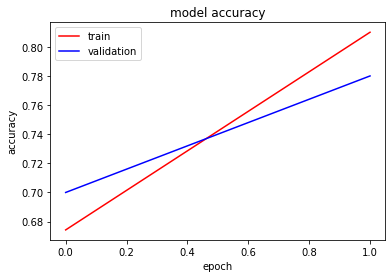

In [32]:
plt.plot(learner.history.history['accuracy'],'r')
plt.plot(learner.history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(r"\bert_acc.png")
plt.show()